Fuente de datos:
https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign


# 1. Base de datos

In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [531]:
archivo = 'marketing_campaign.xlsx'

df= pd.read_excel(archivo,index_col=0)

# print(df.head(10))

In [532]:
# df.info()

In [533]:
# df.columns

In [534]:
# df.shape

## Limpieza de datos

In [535]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [536]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [537]:
#ver si hay datos duplicados
df.duplicated().sum()

182

In [538]:
# Los elimino y me quedo con la primera ocurrencia.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [539]:
# Creo esto para trabajar con Tableau
df.to_excel('Marketing limpio.xlsx', index=False)

 Veo que hay años de nacimientos de 1893 por lo que se espera que esa persona no siga con vida ni comprando o puede ser un error. Se eliminan datos incoherentes, como anteriores a 1934 (personas mayores de 90 años no suele haber)

In [540]:
df = df[df['Year_Birth'] >= 1932]

igual para todas las variables:

In [541]:
# Income tiene un valor que es demasiado grande en comparación al resto, lo elimino
df = df[df['Income'] <= 200000]

# 'MntMeatProducts' También? No estoy segura
df = df[df['MntMeatProducts'] <= 1250]

In [542]:
# Elimino las columnas que tiene un solo valor
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)

# Categóricas a Numéricas

In [ ]:
# Categóricas a numéricas

df = pd.get_dummies(df, columns=['Marital_Status'])
df = pd.get_dummies(df, columns=['Education'])

# df.drop('Rango_edad', axis=1, inplace=True)
df.drop('Year_Birth', axis=1, inplace=True)

# Filtro mi base de datos

Solo dejo los clientes que aceptaron una o más campañas

(Lo único q se me ocurre hacer es separar en los que si aceptaron cada una de las campañas, lugos concatenar y al final eliminar las repetidas)

In [543]:
# Dejo un df con toda la info
df_j=df.copy

df1 = df[df['AcceptedCmp1'] == 1]
df2 = df[df['AcceptedCmp2'] == 1]
df3 = df[df['AcceptedCmp3'] == 1]
df4 = df[df['AcceptedCmp4'] == 1]
df5 = df[df['AcceptedCmp5'] == 1]

df= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

#ver si hay datos duplicados
df.duplicated().sum()

# Los elimino y me quedo con la primera ocurrencia.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Quiero ahora hacer una matriz correlación para ver como cambió con el filtro en la base de datos

In [544]:
# matriz_correlacion = df.corr()

# # Crear un mapa de calor utilizando seaborn
# sns.set(style="white")  # Configuración del estilo
# mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))  # Máscara triangular superior

# # Configurar el tamaño de la figura
# plt.figure(figsize=(28, 16))

# # Crear el mapa de calor
# sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# # Mostrar el mapa de calor
# plt.show()

Claramente las correlaciones relacionadas a las campañas mejoraron y curiosamente las relacionadas a "income" también.

# 3. Clustering

Solo dejo los valores numéricos

In [545]:
df2=df.copy

df = df.select_dtypes(include='number')

## 3.0. Número de clusters recomendados

#### Método del codo (distortion, inertia)

In [546]:
# Librerías para Clustering
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import seaborn as sns

In [547]:
X=df

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

1 : 16779.200588133335
2 : 8909.47872567576
3 : 6201.073710209003
4 : 5138.3094204089575
5 : 4200.672800811182
6 : 3457.6170447361787
7 : 2936.242673413321
8 : 2500.185372565827
9 : 2261.715045764186
1 : 174593617374.42258
2 : 50983289300.3914
3 : 24833273129.28129
4 : 16149828755.004131
5 : 10599339385.716312
6 : 7117540032.608787
7 : 5183435321.021056
8 : 3926381735.752574
9 : 3277556091.209372


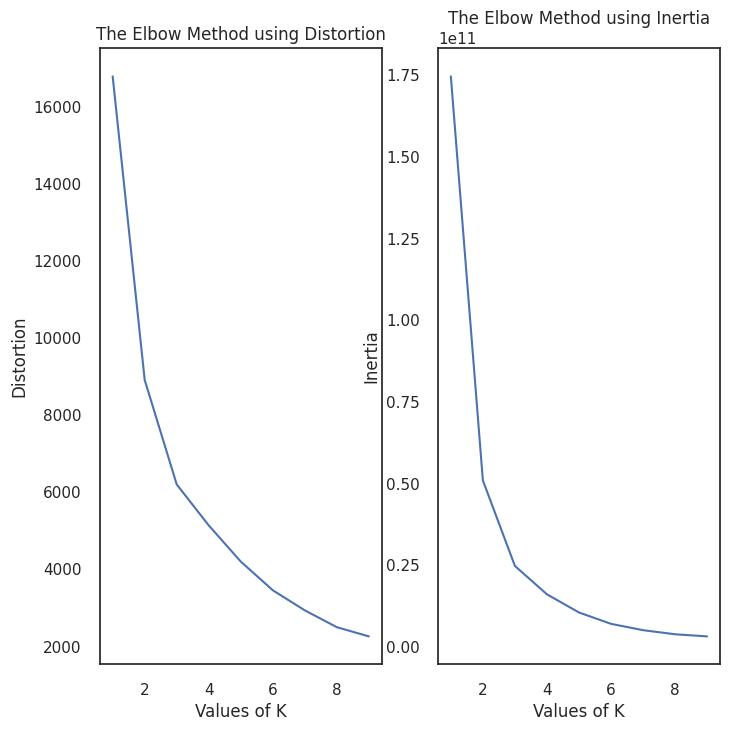

In [548]:
#DISTORCIÓN
for key, val in mapping1.items():
    print(f'{key} : {val}')
#INERCIA
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.figure(figsize=(8,8))
plt.subplot(121), plt.plot(K, distortions, 'bx-'), plt.xlabel('Values of K'), plt.ylabel('Distortion'), plt.title('The Elbow Method using Distortion')
plt.subplot(122), plt.plot(K, inertias, 'bx-'), plt.xlabel('Values of K'), plt.ylabel('Inertia'), plt.title('The Elbow Method using Inertia')
plt.show()

* Todos los clientes

Las mayores torsiones (en Distortions) estan en la curva se encuentran en K=4 y K=5, es decir que el método del codo recomienda 4 o 5 clusters.
No encuentro torsión en Inertias

* Solo con clientes que aceptaron campañas

Con ambos, Distortion e Inertias k=2 o 3

#### Método de la silueta

In [549]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



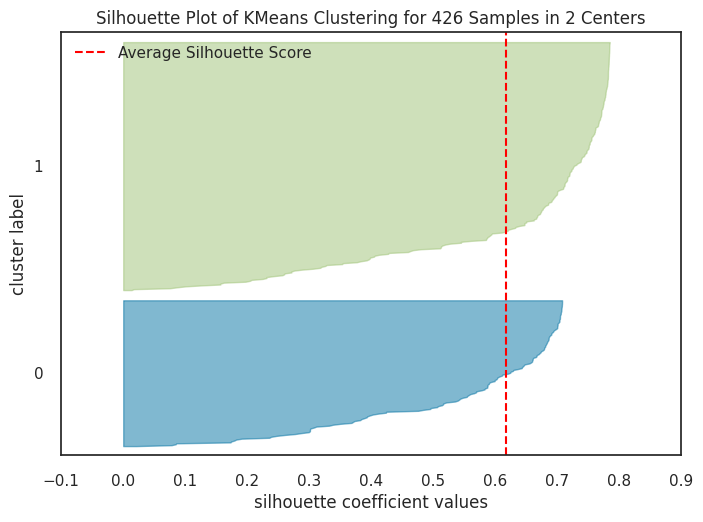

Para n_clusters = 2 El promedio de silhouette_score es : 0.6168102974999502


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



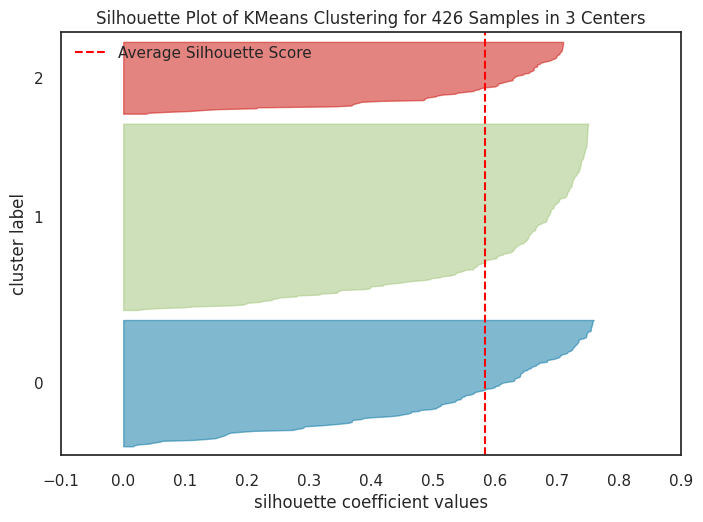

Para n_clusters = 3 El promedio de silhouette_score es : 0.5831390687775634


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



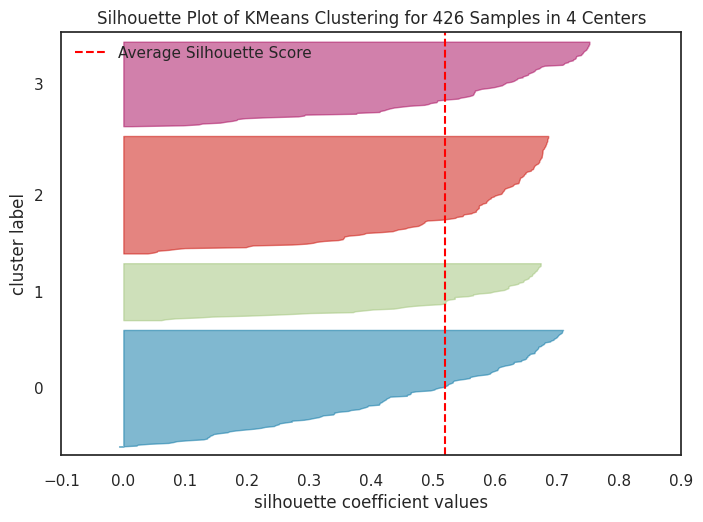

Para n_clusters = 4 El promedio de silhouette_score es : 0.5179858393895331


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



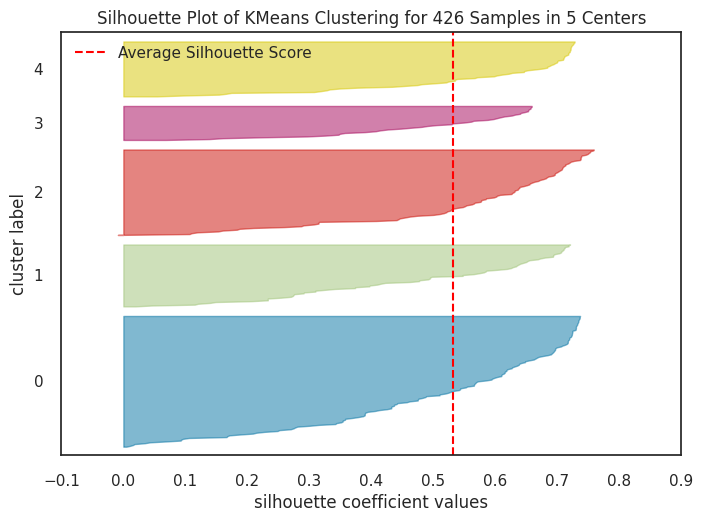

Para n_clusters = 5 El promedio de silhouette_score es : 0.5313957136789308


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



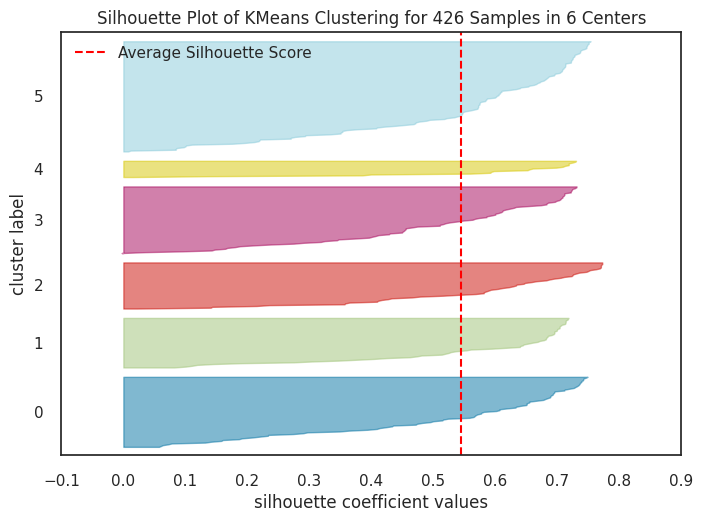

Para n_clusters = 6 El promedio de silhouette_score es : 0.5440492303375923


In [550]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
  visualizer.fit(X)        # Fit the data to the visualizer
  visualizer.show()

  silhouette_avg = silhouette_score(X, cluster_labels)
  print("Para n_clusters =", n_clusters, "El promedio de silhouette_score es :", silhouette_avg)



El análisis de la silueta proporciona la calidad del agrupamiento o clustering: Mide la distancia de separación entre los clusters y nos indica como de cerca está cada punto de un clúster a puntos de los clústers vecinos. Un valor alto indica un buen clustering. Los coeficientes de silueta cercanos a +1 indican que la observación se encuentra lejos de los clústers vecinos.

El número óptimo de clústers n es aquel que maximiza la media de los coeficientes de silueta para un rango de valores de n.

* Todos los clientes

En este caso resulta ser n=2 el que tiene mejor media de coeficiente, con valor 0.60. En la figura se puede ver que la división en 2 se produce de tal manera que uno de los grupos es más grande que el otro.

* Clientes que aceptaron alguna campaña
n=2 el que tiene mejor media de coeficientetiene con valor 0.616.

###Dendograma

/content


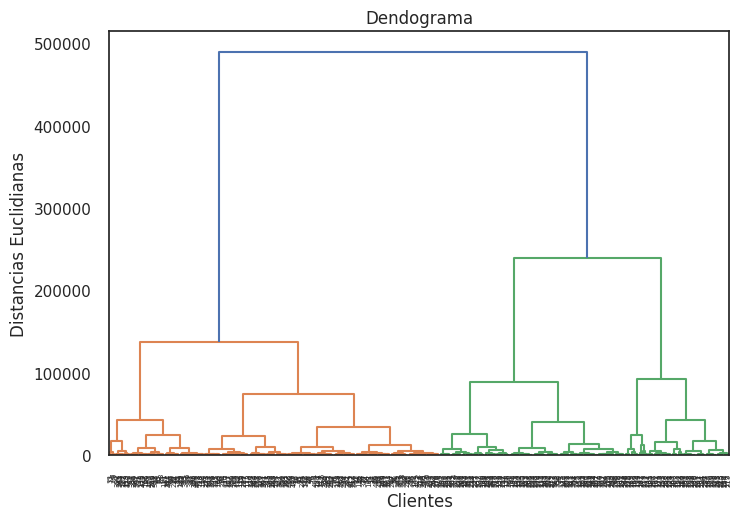

In [551]:
# import csv
import os
print(os.getcwd())

# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# en method pueden ser 'ward', 'average', 'complete', 'single'

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

El número de clusters depende del sitio donde cortemos el dendograma, por lo tanto la decisión sobre el número óptimo de clusters es subjetiva. Es conveniente elegir un número de clusters que sepamos interpretar. Para interpretar los clúster podemos utilizar: ANOVA, Análisis factorial, Análisis discriminante, e incluso aentido común.

Para decidir el número de clusters nos puede ser de gran utilidad representar los distintos pasos del algoritmo y las distancias a la que se produce la fusión de los clusters. En los primeros pasos el salto de las distancias es pequeño, mientras que esas diferencias van aumentando en los sucesivos pasos. Podemos elegir como punto de corte aquel donde comienzan a producirse saltos más bruscos.

https://wpd.ugr.es/~bioestad/guia-spss/practica-8/

* Todos los clientes:

El salto brusco se produce entre etapas 2 y 3, por lo tanto son dos el número de clusters óptimo.

* Clientes que aceptaron alguna campaña

El salto más brusco es cuando se separa en 2 grupos



## 3.1. K-Means

Se comienza con los algoritmos de Clustering. Como se vió anteriormente, el número de Cluster recomendado es 2.

###n_Clusters = 2

In [552]:
num_clusters = 2                                #  Puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [553]:
# Ahora vamos a crear un nuevo dataframe que tenga los mismos datos que el original, y que agregue una ultima columna con los clusters de cada pixel
df['clusters_km2']=kmeans.labels_
df.head(10)
# kmeans.labels_    #con esto puedo ver las etiquetas


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,clusters_km2
0,1946,82800.0,0,0,23,1006,22,115,59,68,...,12,3,0,0,1,1,0,0,1,1
1,1949,76995.0,0,1,91,1012,80,498,0,16,...,9,5,0,0,0,1,0,0,0,1
2,1977,82582.0,0,0,54,510,120,550,156,40,...,7,1,1,0,0,1,0,0,1,1
3,1979,88194.0,0,1,19,688,14,309,201,24,...,10,5,1,0,0,1,0,0,1,1
4,1957,50388.0,0,1,3,292,6,37,0,3,...,6,7,0,1,0,1,0,0,1,0
5,1951,78497.0,0,0,44,207,26,447,75,0,...,12,2,0,0,0,1,0,0,0,1
6,1970,90765.0,0,0,25,547,99,812,151,82,...,5,1,0,0,1,1,0,0,0,1
7,1983,101970.0,0,0,69,722,27,102,44,72,...,13,2,0,1,1,1,0,0,1,1
8,1948,83837.0,0,0,79,847,66,119,86,89,...,5,4,0,1,0,1,0,0,1,1
9,1977,102160.0,0,0,54,763,29,138,76,176,...,10,4,0,1,1,1,0,0,1,1


In [554]:
df['clusters_km2']=kmeans.labels_

df['clusters_km2'].value_counts()

1    268
0    158
Name: clusters_km2, dtype: int64

In [555]:
#Quiero ver los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[1.96956329e+03 4.28126646e+04 5.00000000e-01 6.01265823e-01
  4.69050633e+01 2.87917722e+02 8.93037975e+00 5.96772152e+01
  1.37151899e+01 8.27848101e+00 4.13481013e+01 2.94936709e+00
  4.36075949e+00 2.32278481e+00 4.86075949e+00 6.84810127e+00
  6.32911392e-01 3.41772152e-01 1.26582278e-02 4.43037975e-02
  5.06329114e-02 6.32911392e-03 3.60759494e-01]
 [1.96783209e+03 7.80714104e+04 5.97014925e-02 2.94776119e-01
  4.85858209e+01 7.97399254e+02 5.25298507e+01 4.17656716e+02
  7.72089552e+01 5.80485075e+01 7.42052239e+01 1.47388060e+00
  5.78731343e+00 5.65671642e+00 8.24253731e+00 3.54477612e+00
  1.90298507e-01 3.76865672e-01 5.37313433e-01 4.70149254e-01
  6.71641791e-02 3.73134328e-03 4.36567164e-01]]


####Visualización

In [556]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Year_Birth'],
    y= df['Income'],
    z= df['NumWebVisitsMonth'],
    mode='markers',
     marker=dict(
        color = kmeans.labels_,
        size= 10,
        line=dict(
            #  color = invierno['Ap'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    # title= 'Jugando',
    scene = dict(
            xaxis = dict(title  = 'Year_Birth'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'AcceptedCmp3')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



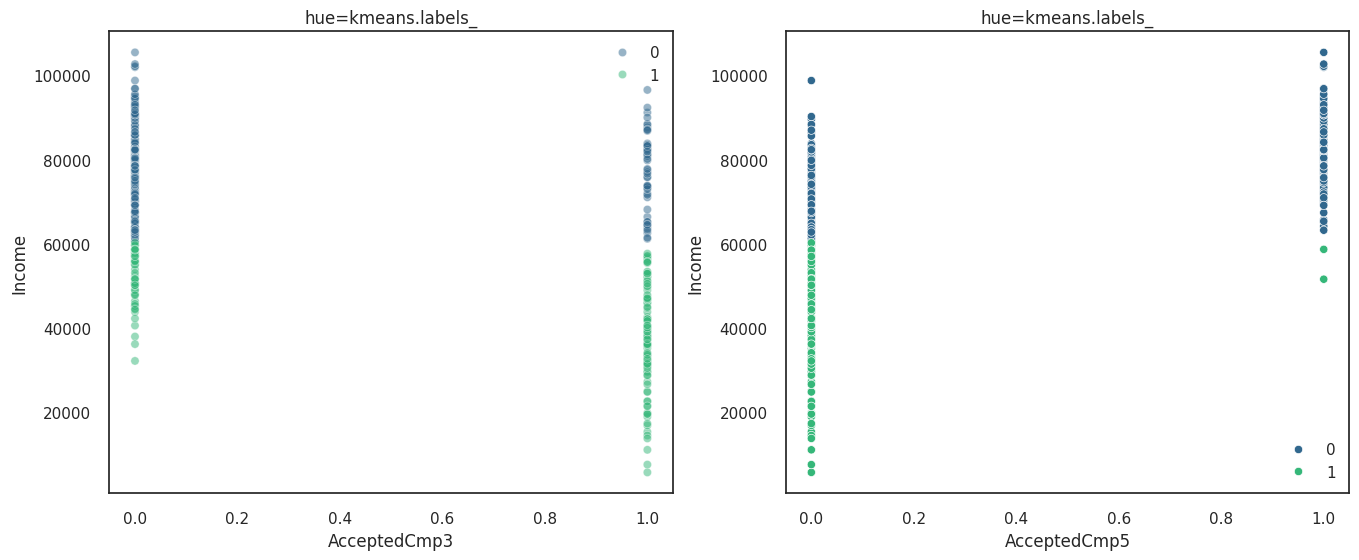

In [557]:
num_clusters = 2                                        #  Esto no hace falta pero puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=df, x="AcceptedCmp3", y="Income" , hue=kmeans.labels_, palette="viridis" , alpha=0.5), plt.title('hue=kmeans.labels_')
plt.subplot(122), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Income",palette="viridis", hue=kmeans.labels_), plt.title('hue=kmeans.labels_')
plt.show()

Al visualizar el cluster se puede ver claramente que lo define según su "Income".

-------------------------------------------------

####Correlación

Busco la correlación de los parámetros ya con la clusterización

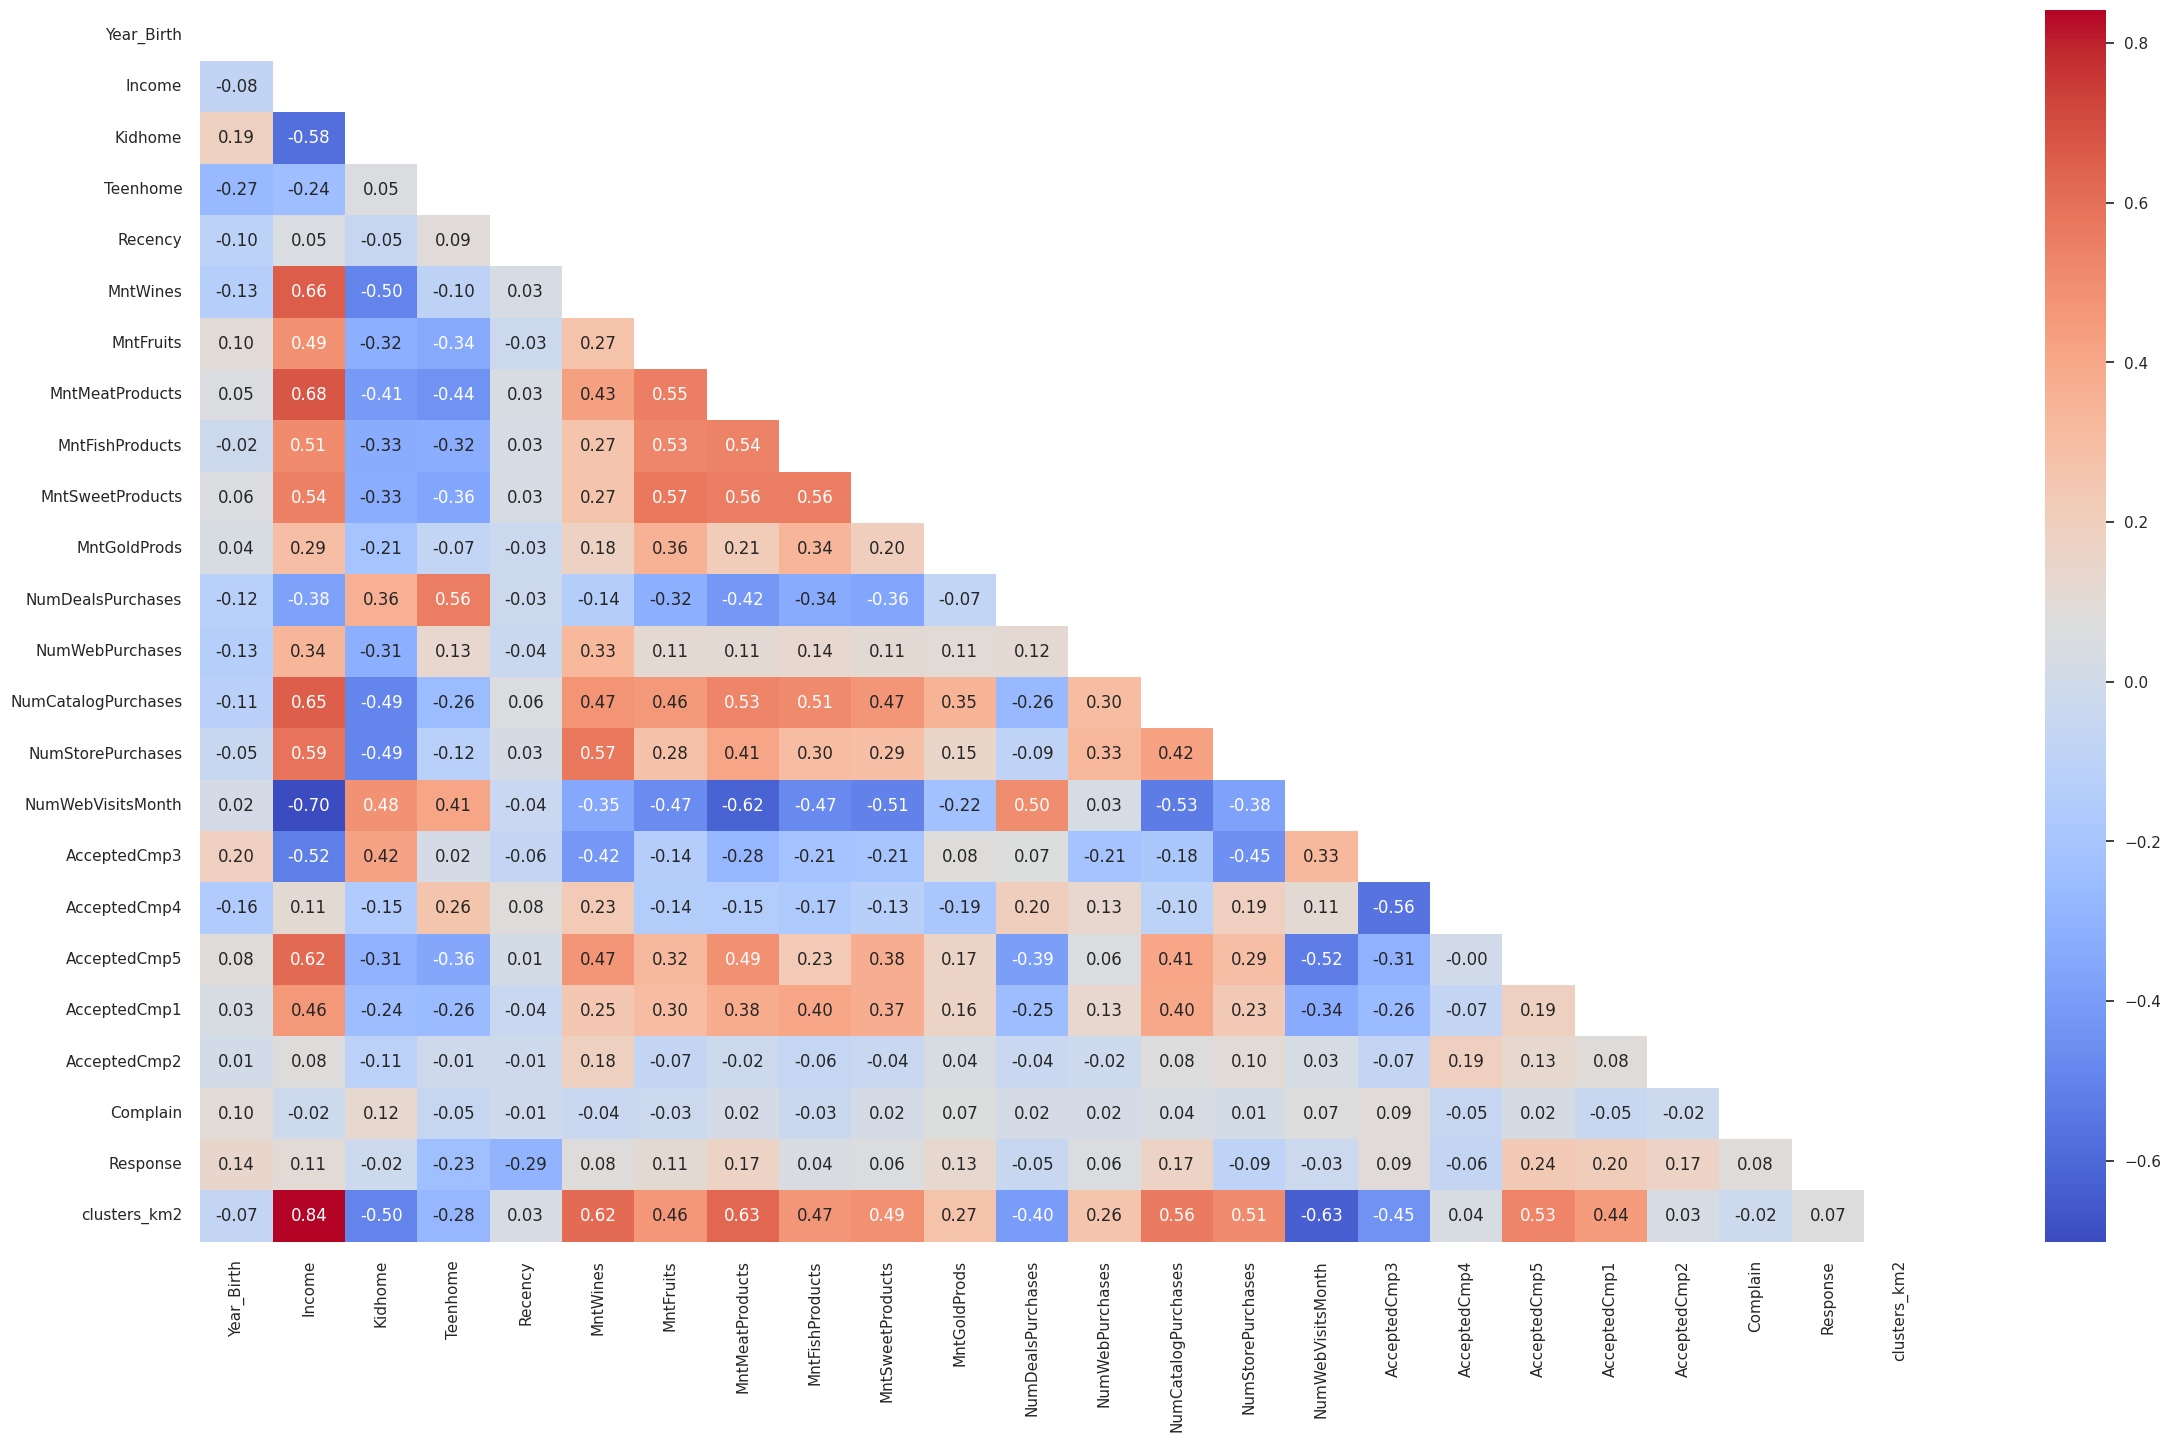

In [558]:
matriz_correlacion = df.corr()

# Crear un mapa de calor utilizando seaborn
sns.set(style="white")  # Configuración del estilo
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))  # Máscara triangular superior

# Configurar el tamaño de la figura
plt.figure(figsize=(28, 16))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# Mostrar el mapa de calor
plt.show()

###n_Clusters = 3

Al ser el Cluster con n=2 tan similar a lo antes estudiado, investigo si el método "cambia de criterio" cuando se le piden 3 clusters.

In [559]:
num_clusters = 3                                #  Puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [560]:
# Ahora vamos a crear un nuevo dataframe que tenga los mismos datos que el original, y que agregue una ultima columna con los clusters de cada pixel
df['clusters_km3']=kmeans.labels_
df.head(10)
# kmeans.labels_    #con esto puedo ver las etiquetas

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,clusters_km2,clusters_km3
0,1946,82800.0,0,0,23,1006,22,115,59,68,...,3,0,0,1,1,0,0,1,1,0
1,1949,76995.0,0,1,91,1012,80,498,0,16,...,5,0,0,0,1,0,0,0,1,0
2,1977,82582.0,0,0,54,510,120,550,156,40,...,1,1,0,0,1,0,0,1,1,0
3,1979,88194.0,0,1,19,688,14,309,201,24,...,5,1,0,0,1,0,0,1,1,0
4,1957,50388.0,0,1,3,292,6,37,0,3,...,7,0,1,0,1,0,0,1,0,2
5,1951,78497.0,0,0,44,207,26,447,75,0,...,2,0,0,0,1,0,0,0,1,0
6,1970,90765.0,0,0,25,547,99,812,151,82,...,1,0,0,1,1,0,0,0,1,0
7,1983,101970.0,0,0,69,722,27,102,44,72,...,2,0,1,1,1,0,0,1,1,0
8,1948,83837.0,0,0,79,847,66,119,86,89,...,4,0,1,0,1,0,0,1,1,0
9,1977,102160.0,0,0,54,763,29,138,76,176,...,4,0,1,1,1,0,0,1,1,0


In [561]:
df['clusters_km3']=kmeans.labels_

df['clusters_km3'].value_counts()

0    206
2    140
1     80
Name: clusters_km3, dtype: int64

#### Visualización

In [562]:
#Quiero ver los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.96864563e+03  8.19800680e+04  3.88349515e-02  1.65048544e-01
   4.98543689e+01  8.06820388e+02  6.05873786e+01  4.82208738e+02
   9.04660194e+01  6.82912621e+01  7.95194175e+01  1.06310680e+00
   5.51456311e+00  6.15048544e+00  8.29126214e+00  2.97572816e+00
   1.89320388e-01  3.15533981e-01  6.50485437e-01  5.33980583e-01
   6.31067961e-02  4.85436893e-03  4.85436893e-01  1.00000000e+00]
 [ 1.97406250e+03  3.24930875e+04  7.75000000e-01  3.62500000e-01
   4.43500000e+01  9.26000000e+01  6.23750000e+00  3.39250000e+01
   7.77500000e+00  4.87500000e+00  3.39375000e+01  2.37500000e+00
   2.83750000e+00  1.33750000e+00  3.12500000e+00  7.11250000e+00
   8.75000000e-01  1.25000000e-01 -1.66533454e-16  1.25000000e-02
  -8.32667268e-17  1.25000000e-02  4.12500000e-01  4.44089210e-16]
 [ 1.96502857e+03  5.85728429e+04  1.78571429e-01  7.92857143e-01
   4.72428571e+01  6.11292857e+02  1.79214286e+01  1.37942857e+02
   2.57214286e+01  1.71928571e+01  5.23142857e+01  3.22857143e+00
   6.264

In [563]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Year_Birth'],
    y= df['Income'],
    z= df['AcceptedCmp3'],
    mode='markers',
     marker=dict(
        color = df['clusters_km3'],
        size= 10,
        line=dict(
            #  color = invierno['Ap'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    # title= 'Jugando',
    scene = dict(
            xaxis = dict(title  = 'Year_Birth'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'AcceptedCmp3')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

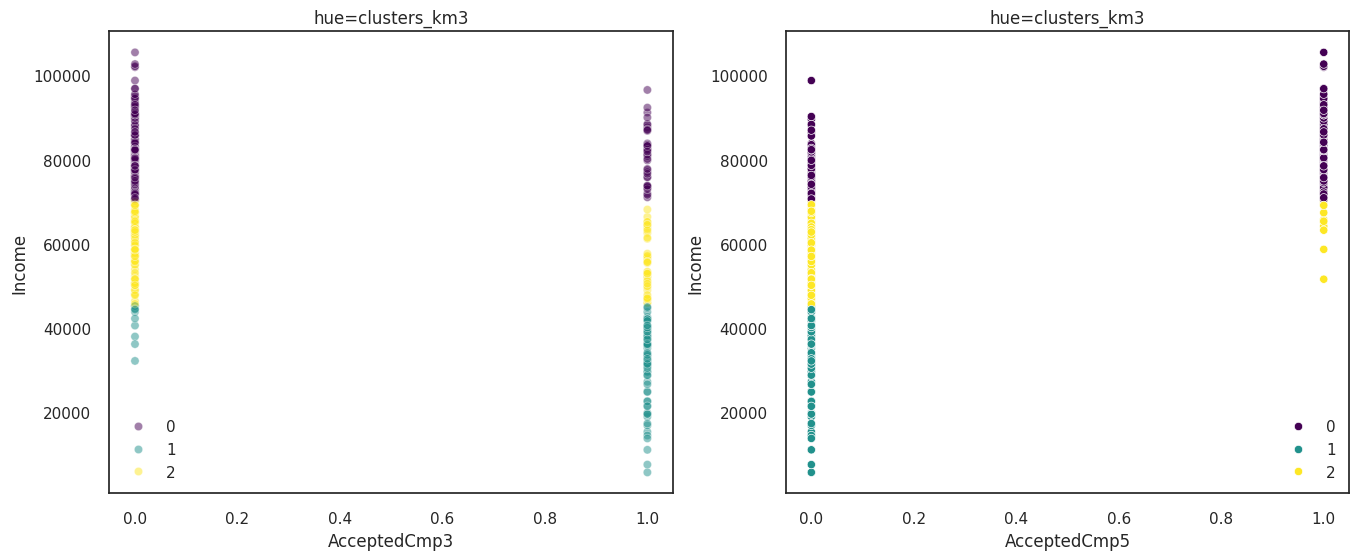

In [564]:
plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=df, x="AcceptedCmp3", y="Income" , hue=kmeans.labels_, palette="viridis" , alpha=0.5), plt.title('hue=clusters_km3')
plt.subplot(122), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Income",palette="viridis", hue=kmeans.labels_), plt.title('hue=clusters_km3')
plt.show()

De nuevo clusterizó en "Income"

####Correlación

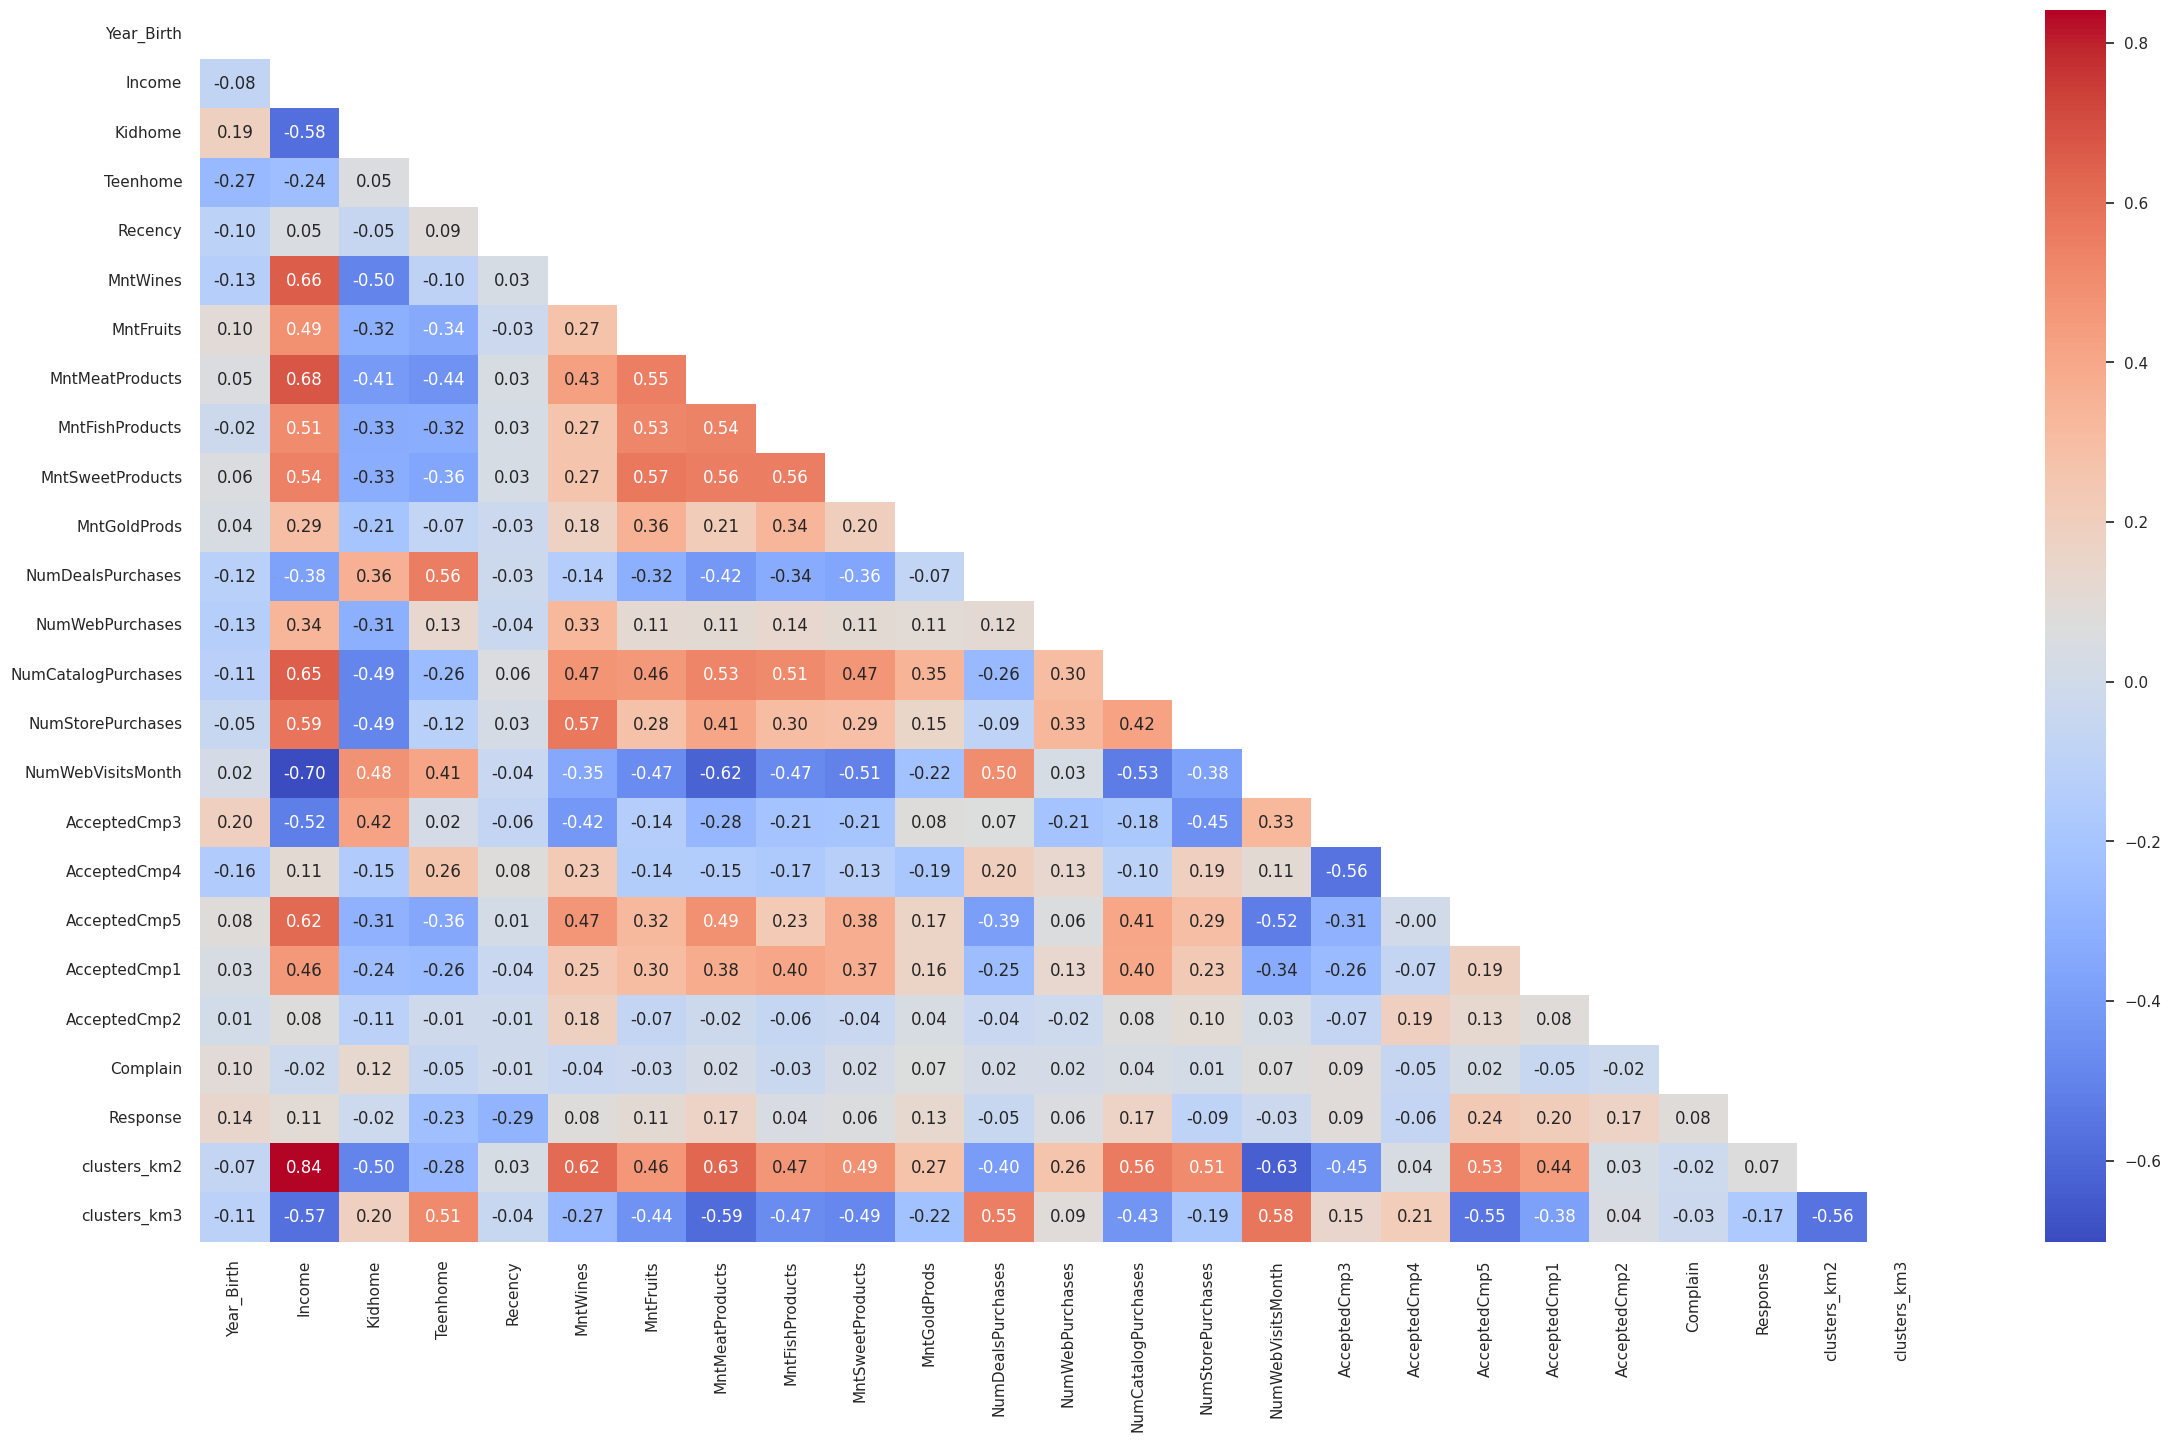

In [565]:
matriz_correlacion = df.corr()

# Crear un mapa de calor utilizando seaborn
sns.set(style="white")  # Configuración del estilo
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))  # Máscara triangular superior

# Configurar el tamaño de la figura
plt.figure(figsize=(28, 16))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# Mostrar el mapa de calor
plt.show()

## 3.2 MeanShift

In [566]:
from sklearn.cluster import estimate_bandwidth
bw=estimate_bandwidth(X,quantile=0.3)
print(bw)

12305.71644873272


In [567]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
ms = MeanShift(bandwidth=8501.7, bin_seeding=False) #bin_seeding=True usa versión discretizada de los puntos en una
# cuadrícula que tiene que ver con el ancho de banda, agiliza el algoritmo
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)
# print('cantidad de datos por cluster: ', Counter(ms.labels_))


In [568]:
df['clusters_MS']=ms.labels_

df['clusters_MS'].value_counts()

0    206
2    118
1    102
Name: clusters_MS, dtype: int64

In [569]:
df.head(10)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,clusters_km2,clusters_km3,clusters_MS
0,1946,82800.0,0,0,23,1006,22,115,59,68,...,0,0,1,1,0,0,1,1,0,0
1,1949,76995.0,0,1,91,1012,80,498,0,16,...,0,0,0,1,0,0,0,1,0,0
2,1977,82582.0,0,0,54,510,120,550,156,40,...,1,0,0,1,0,0,1,1,0,0
3,1979,88194.0,0,1,19,688,14,309,201,24,...,1,0,0,1,0,0,1,1,0,0
4,1957,50388.0,0,1,3,292,6,37,0,3,...,0,1,0,1,0,0,1,0,2,2
5,1951,78497.0,0,0,44,207,26,447,75,0,...,0,0,0,1,0,0,0,1,0,0
6,1970,90765.0,0,0,25,547,99,812,151,82,...,0,0,1,1,0,0,0,1,0,0
7,1983,101970.0,0,0,69,722,27,102,44,72,...,0,1,1,1,0,0,1,1,0,0
8,1948,83837.0,0,0,79,847,66,119,86,89,...,0,1,0,1,0,0,1,1,0,0
9,1977,102160.0,0,0,54,763,29,138,76,176,...,0,1,1,1,0,0,1,1,0,0


#### Visualización

In [570]:

trace1 = go.Scatter3d(
    x= df['Year_Birth'],
    y= df['Income'],
    z= df['AcceptedCmp3'],
    mode='markers',
     marker=dict(
        color = df['clusters_MS'],
        size= 10,
        line=dict(
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    # title= 'Jugando',
    scene = dict(
            xaxis = dict(title  = 'Year_Birth'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'AcceptedCmp3')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

De nuevo es separado por "Income"

# Filtro mi base de datos

Solo dejo los clientes que aceptaron una o más campañas

(Lo único q se me ocurre hacer es separar en los que si aceptaron cada una de las campañas, lugos concatenar y al final eliminar las repetidas)

In [571]:
# Dejo un df con toda la info
df_j=df.copy

df1 = df[df['AcceptedCmp1'] == 1]
df2 = df[df['AcceptedCmp2'] == 1]
df3 = df[df['AcceptedCmp3'] == 1]
df4 = df[df['AcceptedCmp4'] == 1]
df5 = df[df['AcceptedCmp5'] == 1]

df= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

#ver si hay datos duplicados
df.duplicated().sum()

# Los elimino y me quedo con la primera ocurrencia.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Quiero ahora hacer una matriz correlación para ver como cambió con el filtro en la base de datos

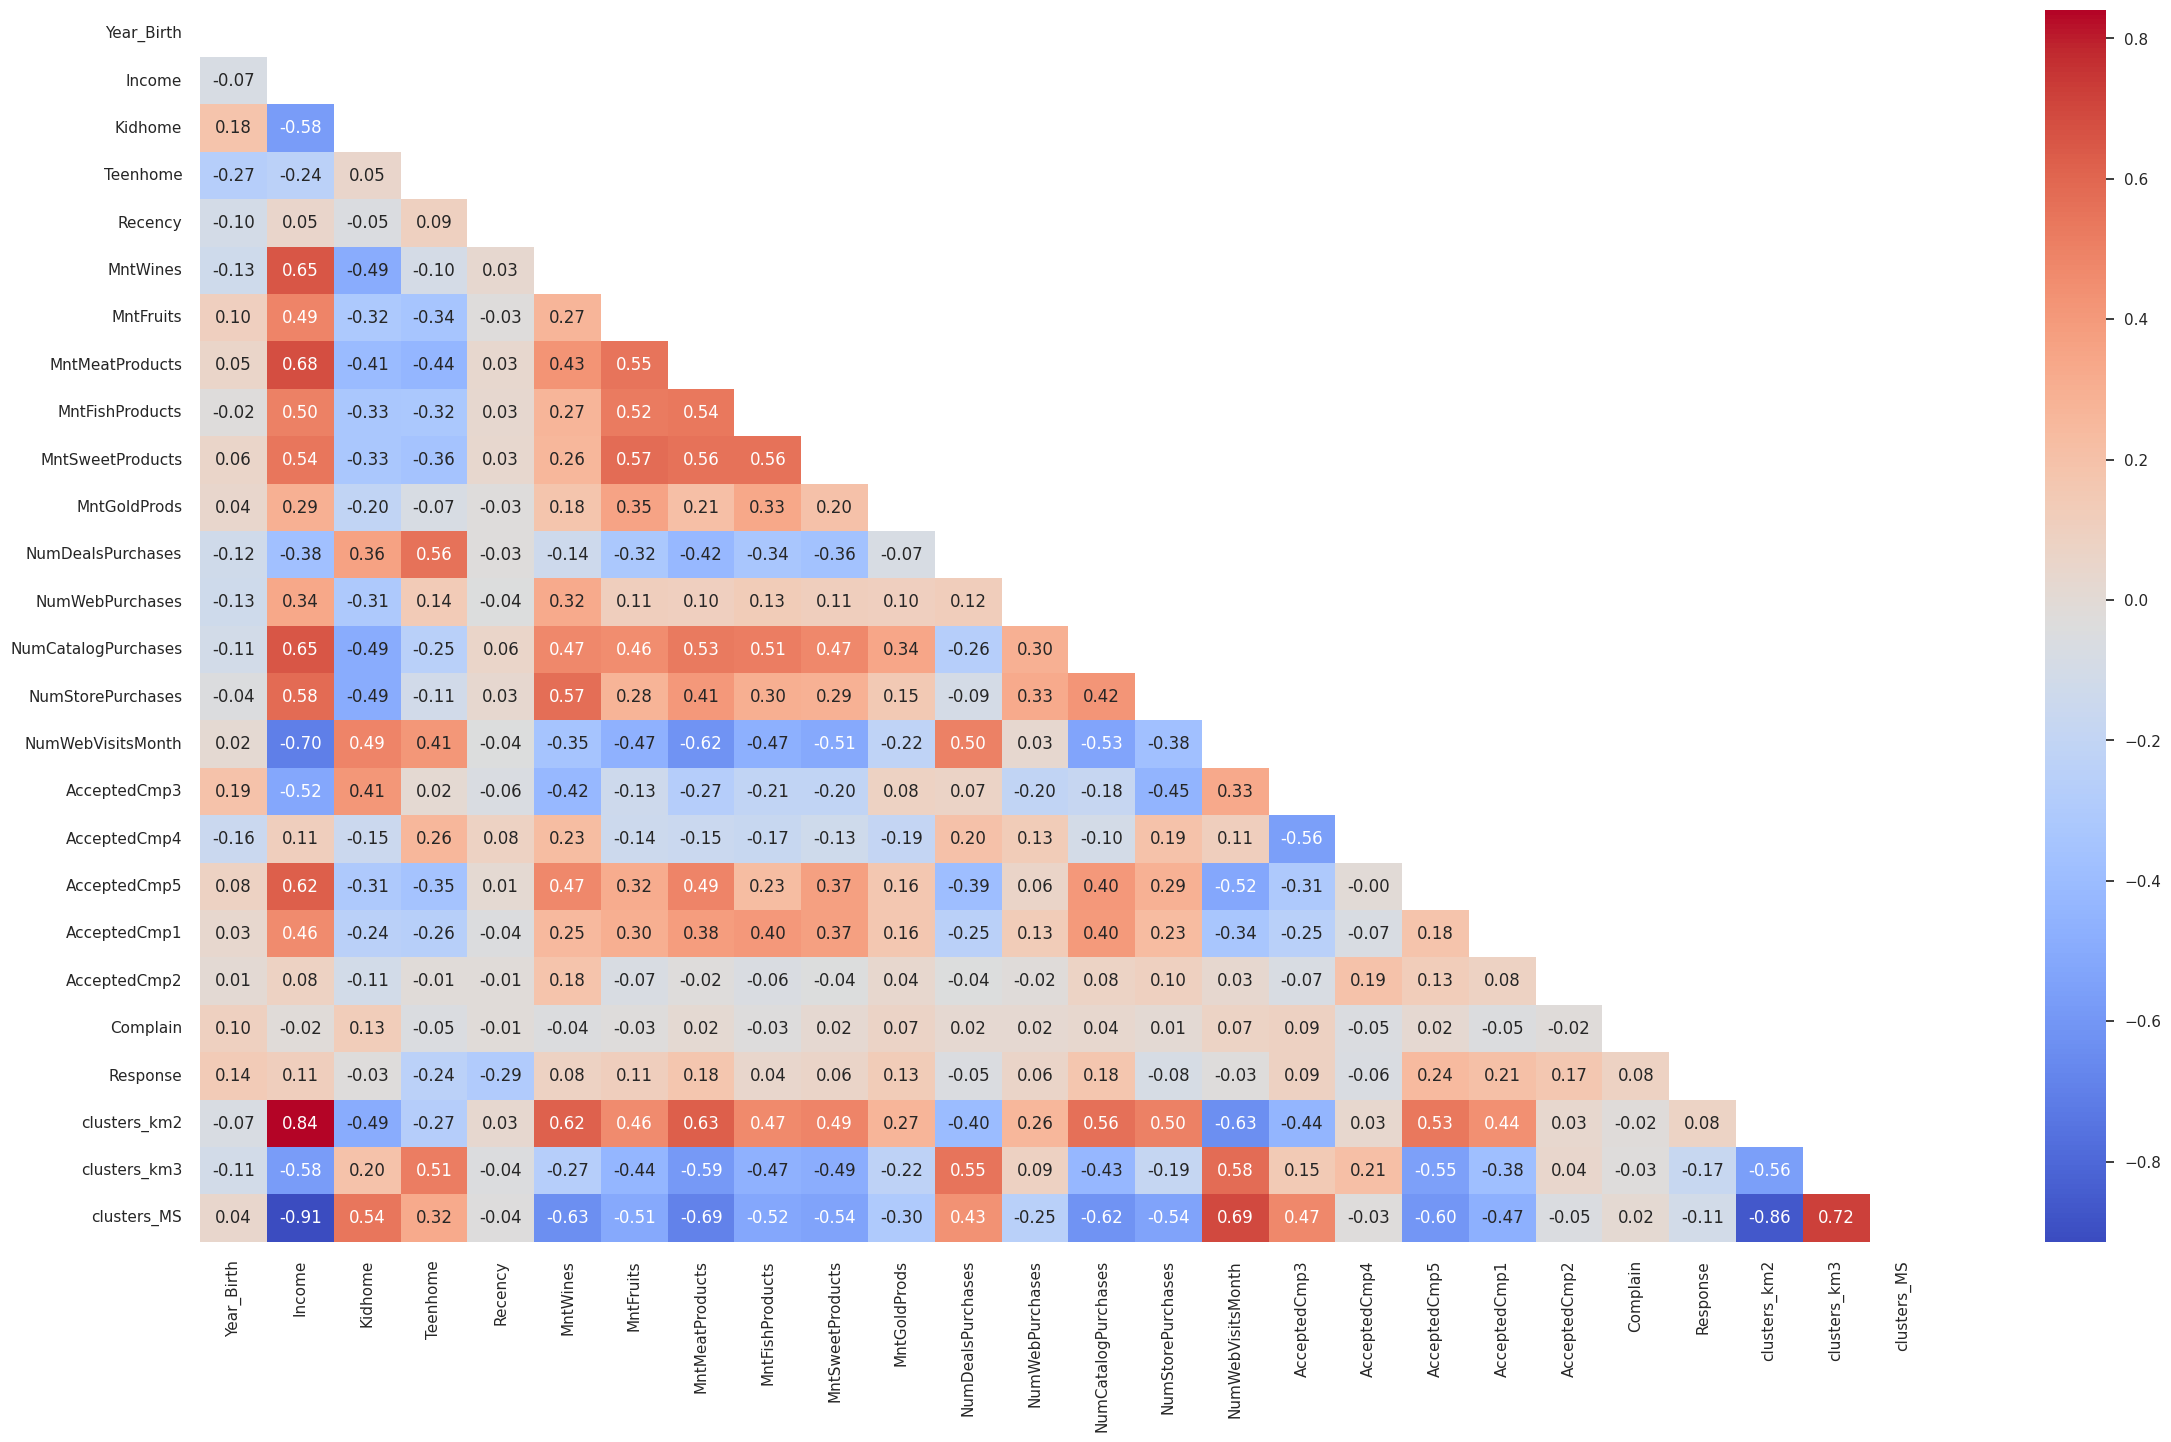

In [572]:
matriz_correlacion = df.corr()

# Crear un mapa de calor utilizando seaborn
sns.set(style="white")  # Configuración del estilo
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))  # Máscara triangular superior

# Configurar el tamaño de la figura
plt.figure(figsize=(28, 16))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# Mostrar el mapa de calor
plt.show()

Claramente las correlaciones relacionadas a las campañas mejoraron y curiosamente las relacionadas a "income" también.